In [2]:
#importation librairies pertinentes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.impute import KNNImputer
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api
import statsmodels.api
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# pd.set_option("max_rows", 10)
import sys
# !{sys.executable} -m pip install missingno
import missingno as msno
%matplotlib inline
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install category_encoders 
import category_encoders as ce

C:\Users\dell-\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dell-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\dell-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
from collections import Counter

In [6]:
from sklearn import model_selection
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
%matplotlib inline
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import kernel_ridge
from collections import Counter
import sys
#!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor
import shap

In [7]:
# to show all columns
pd.set_option('display.max_columns', 82)  #from kaggle https://www.kaggle.com/code/iabahmad19/house-price-prediction-top-6

In [8]:
data_train = pd.read_csv('train.csv',index_col=0, sep = ',', header = 0) #lecture données
data_train.shape #dimensions dataFrame

(1460, 80)

In [9]:
data_test = pd.read_csv('test.csv',index_col=0, sep = ',', header = 0) #lecture données
data_test.shape #dimensions dataFrame

(1459, 79)

In [10]:
#from kaggle https://www.kaggle.com/code/iabahmad19/house-price-prediction-top-6
print("The number of rows in train data is {0}, and the number of columns in train data is {1}".
      format(data_train.shape[0], data_train.shape[1]))
      
print("The number of rows in test data is {0}, and the number of columns in test data is {1}".
      format(data_test.shape[0], data_test.shape[1]))

The number of rows in train data is 1460, and the number of columns in train data is 80
The number of rows in test data is 1459, and the number of columns in test data is 79


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [13]:
#exploration données
data_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


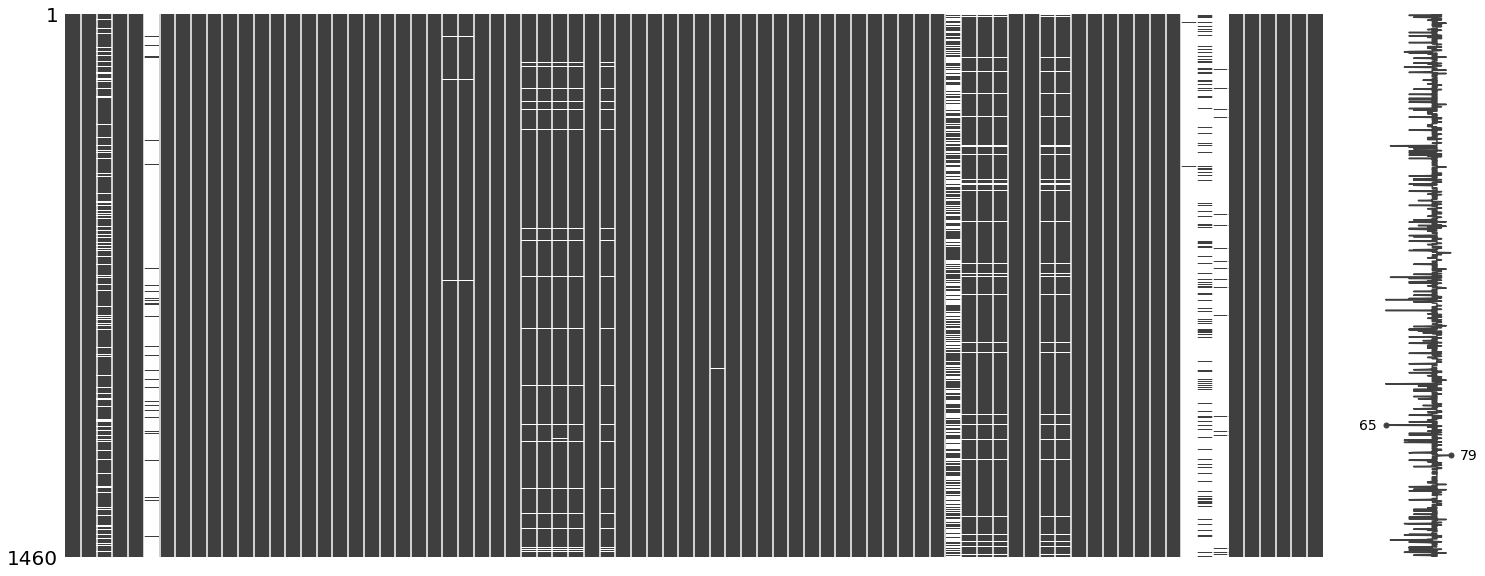

In [14]:
#exploration données : valeurs NAN 
msno.matrix(data_train.sample(1460))

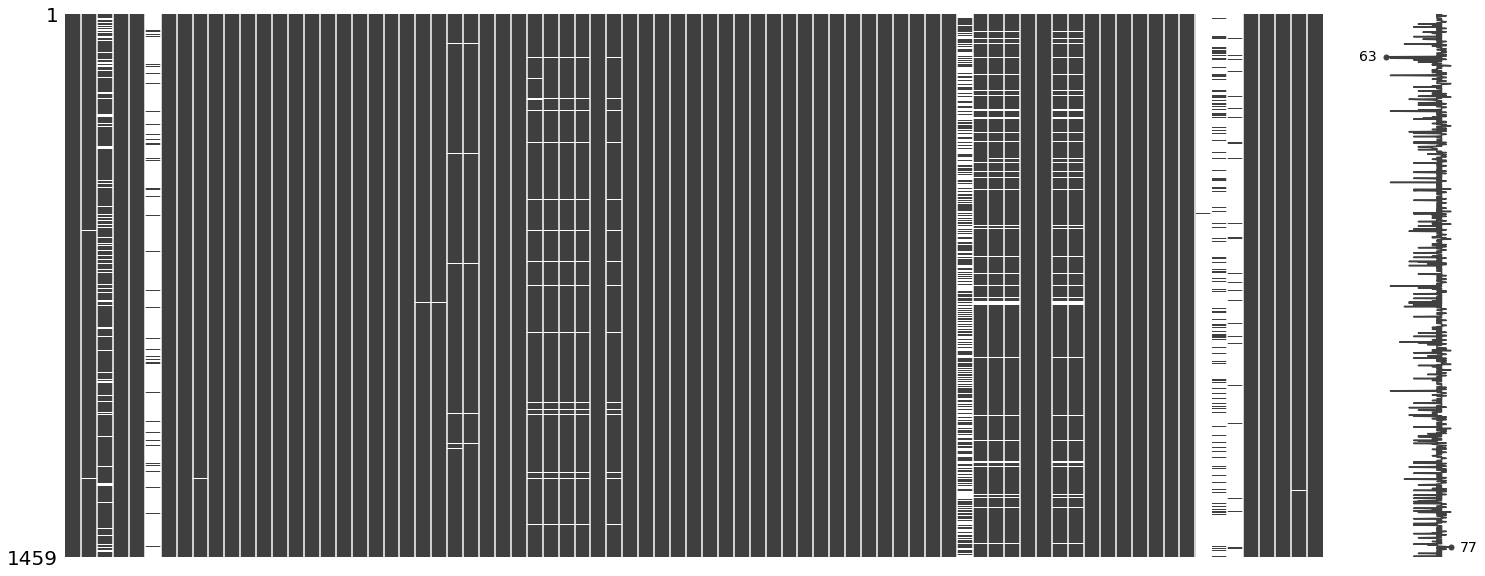

In [15]:
msno.matrix(data_test.sample(1459))

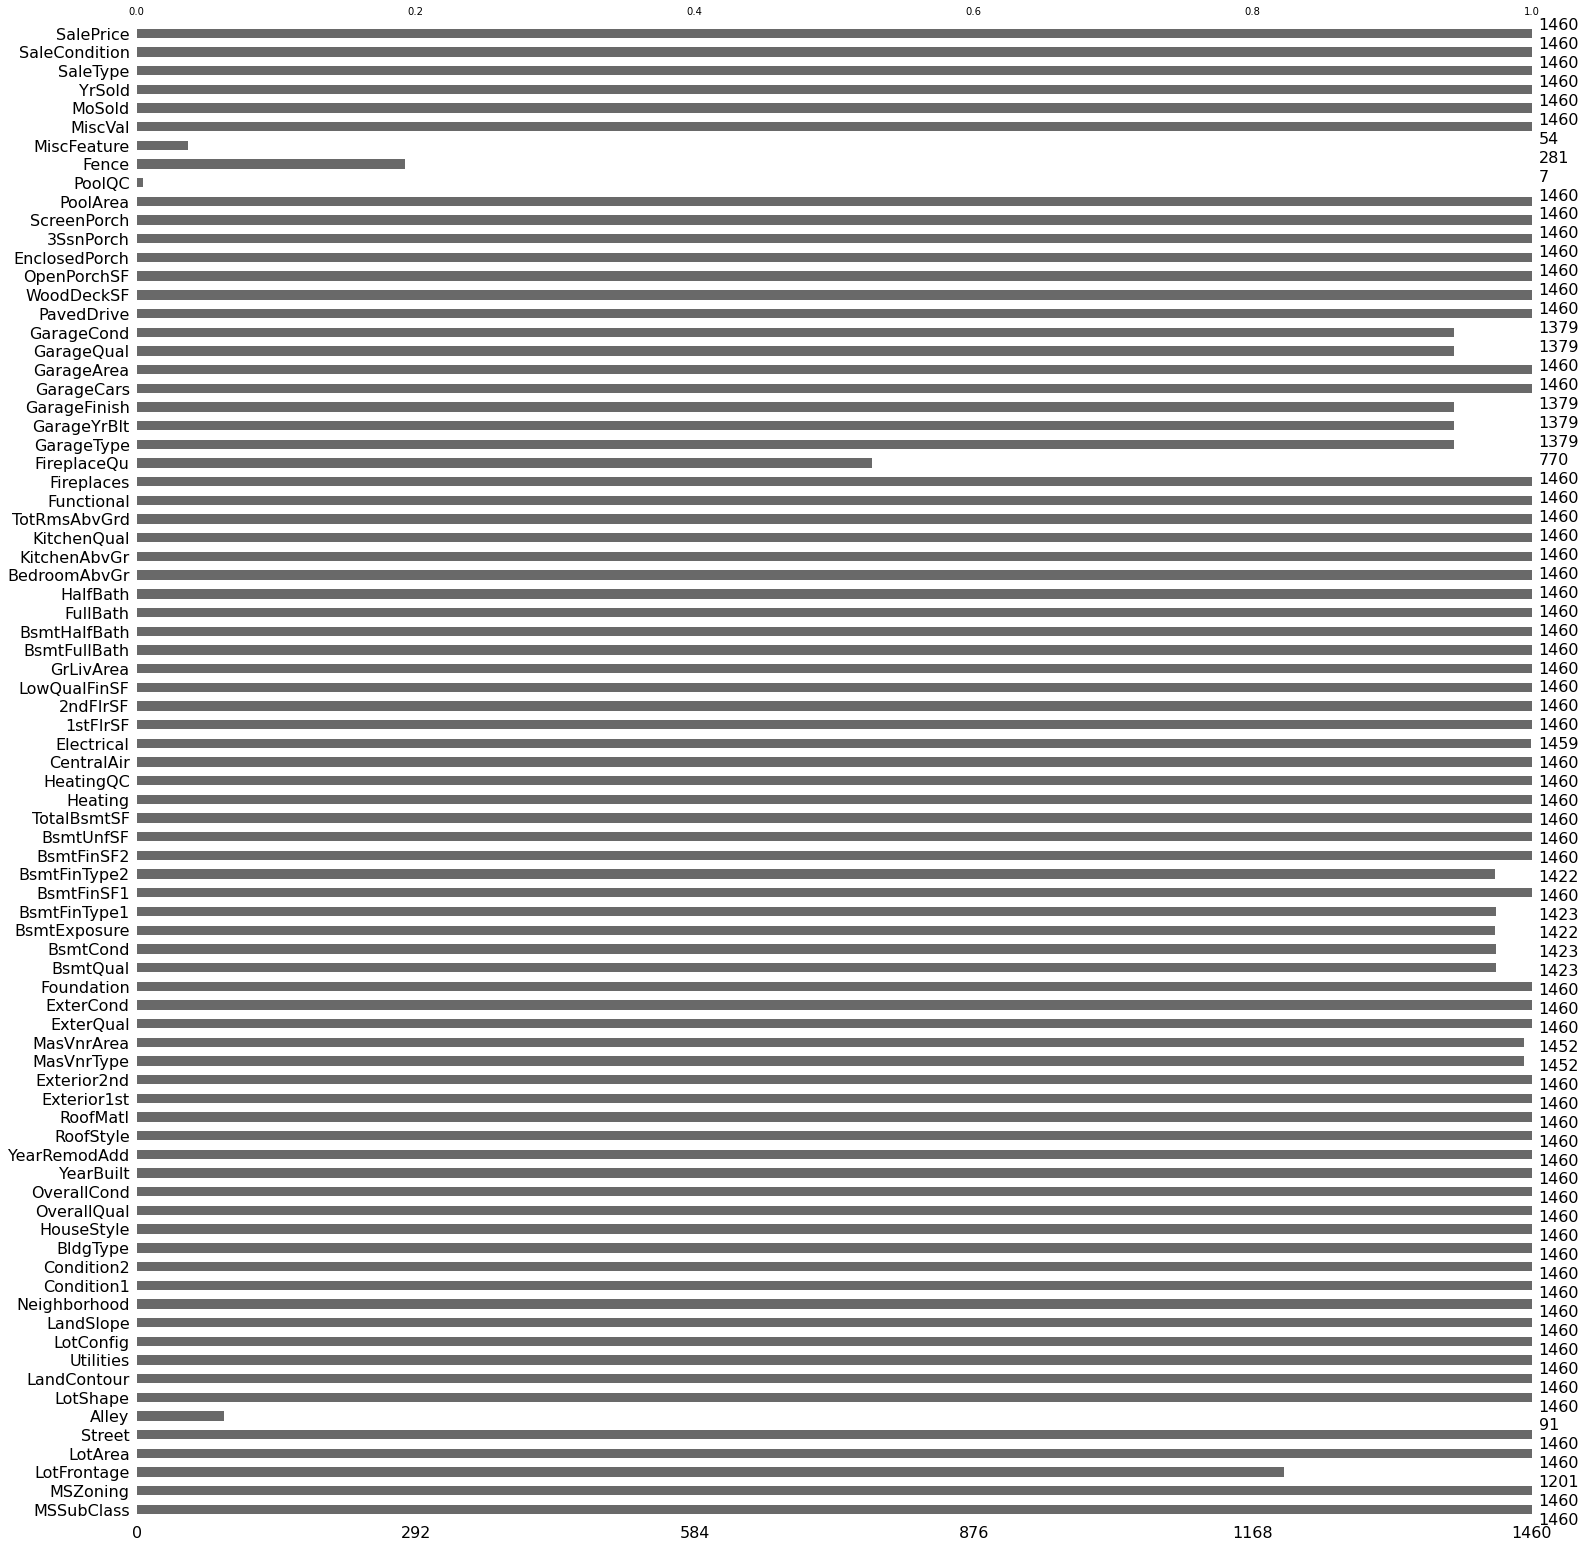

In [16]:
#exploration données : valeurs NAN 
msno.bar(data_train.sample(1460))

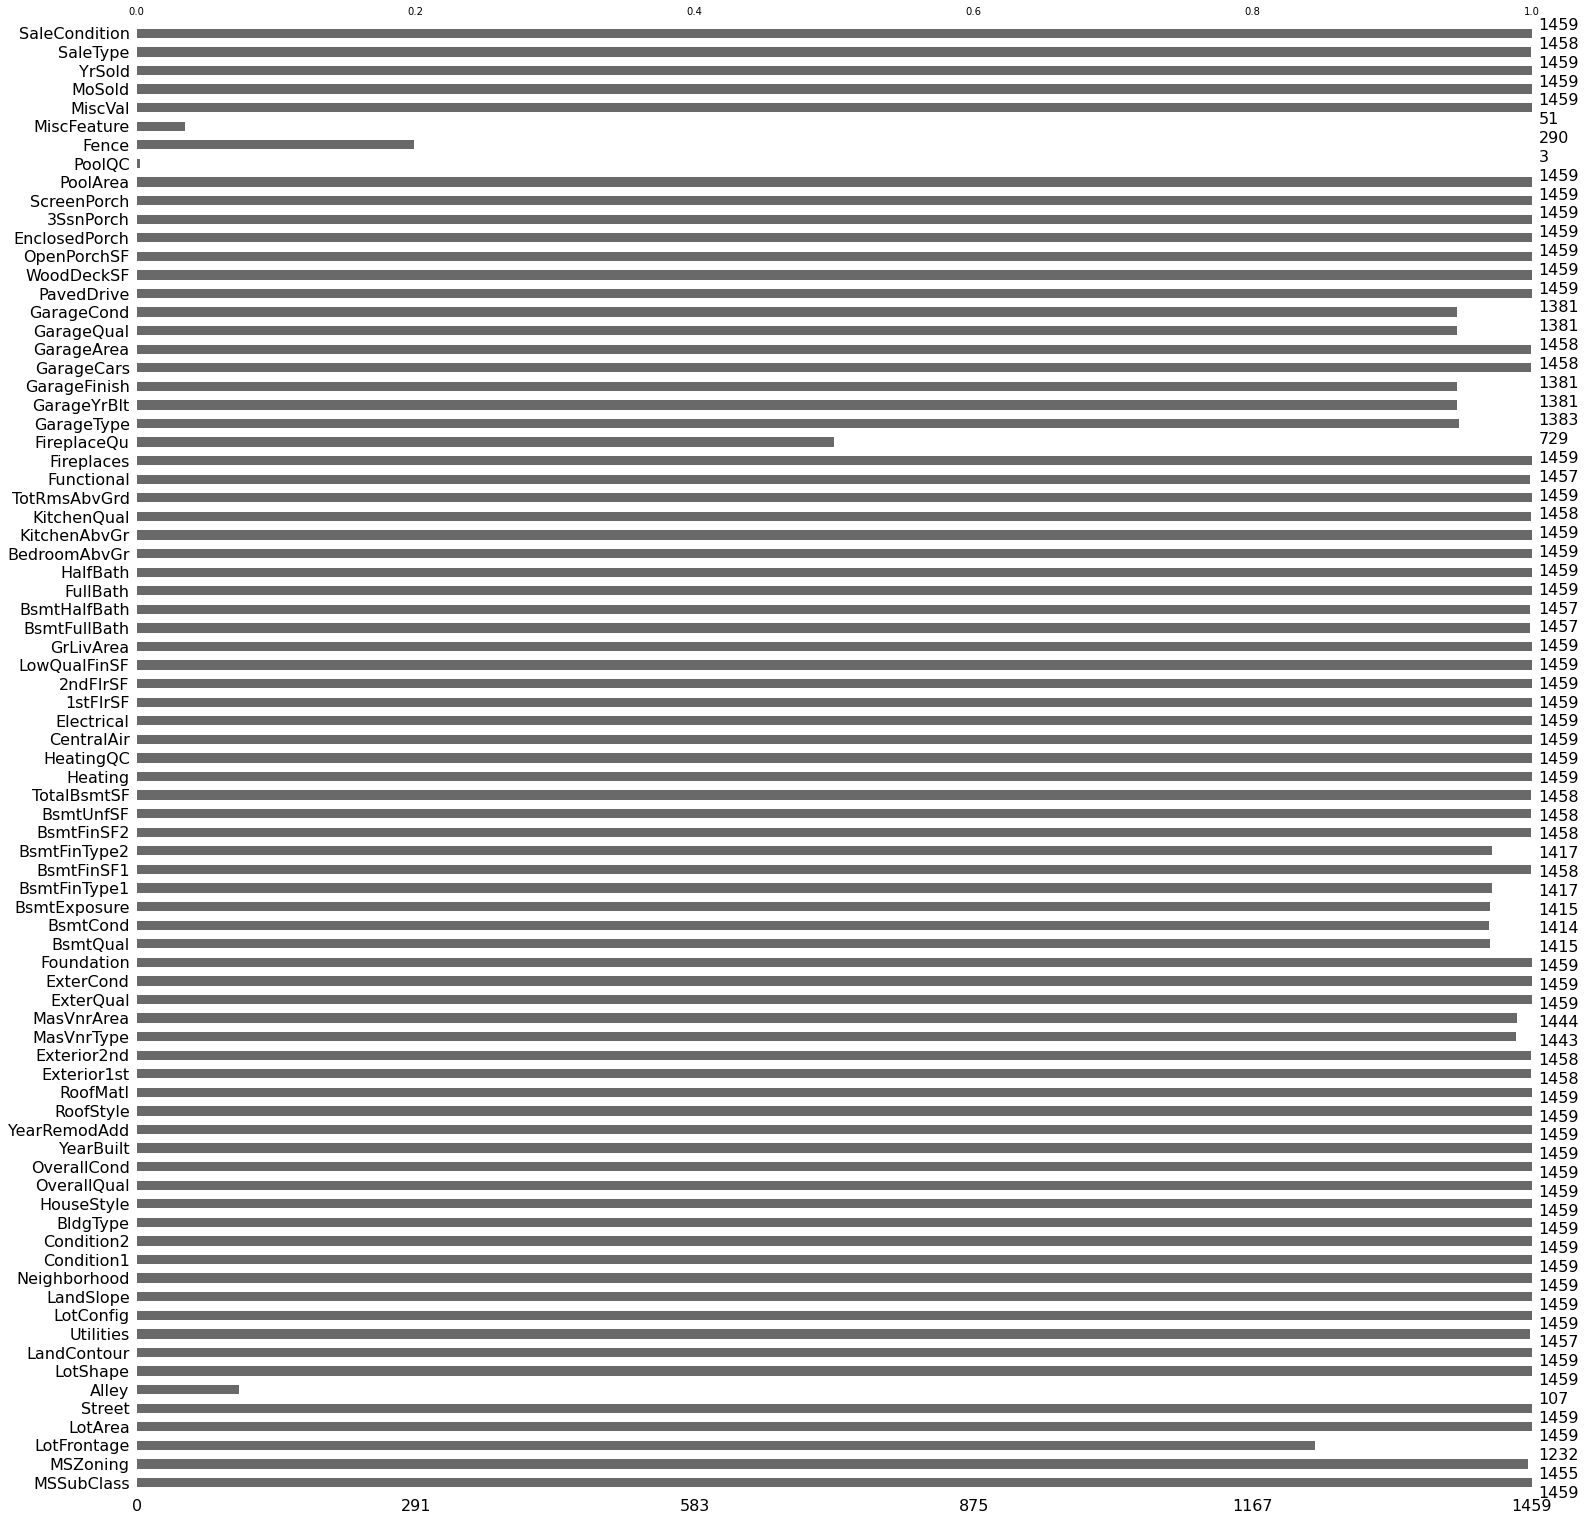

In [17]:
#exploration données : valeurs NAN 
msno.bar(data_test.sample(1459))

In [18]:
#dendrogramme  permet de corréler plus complètement le remplissage des variables
# msno.dendrogram(data)

In [21]:
list_numeric_vars=numeric_vars.columns
list_numeric_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

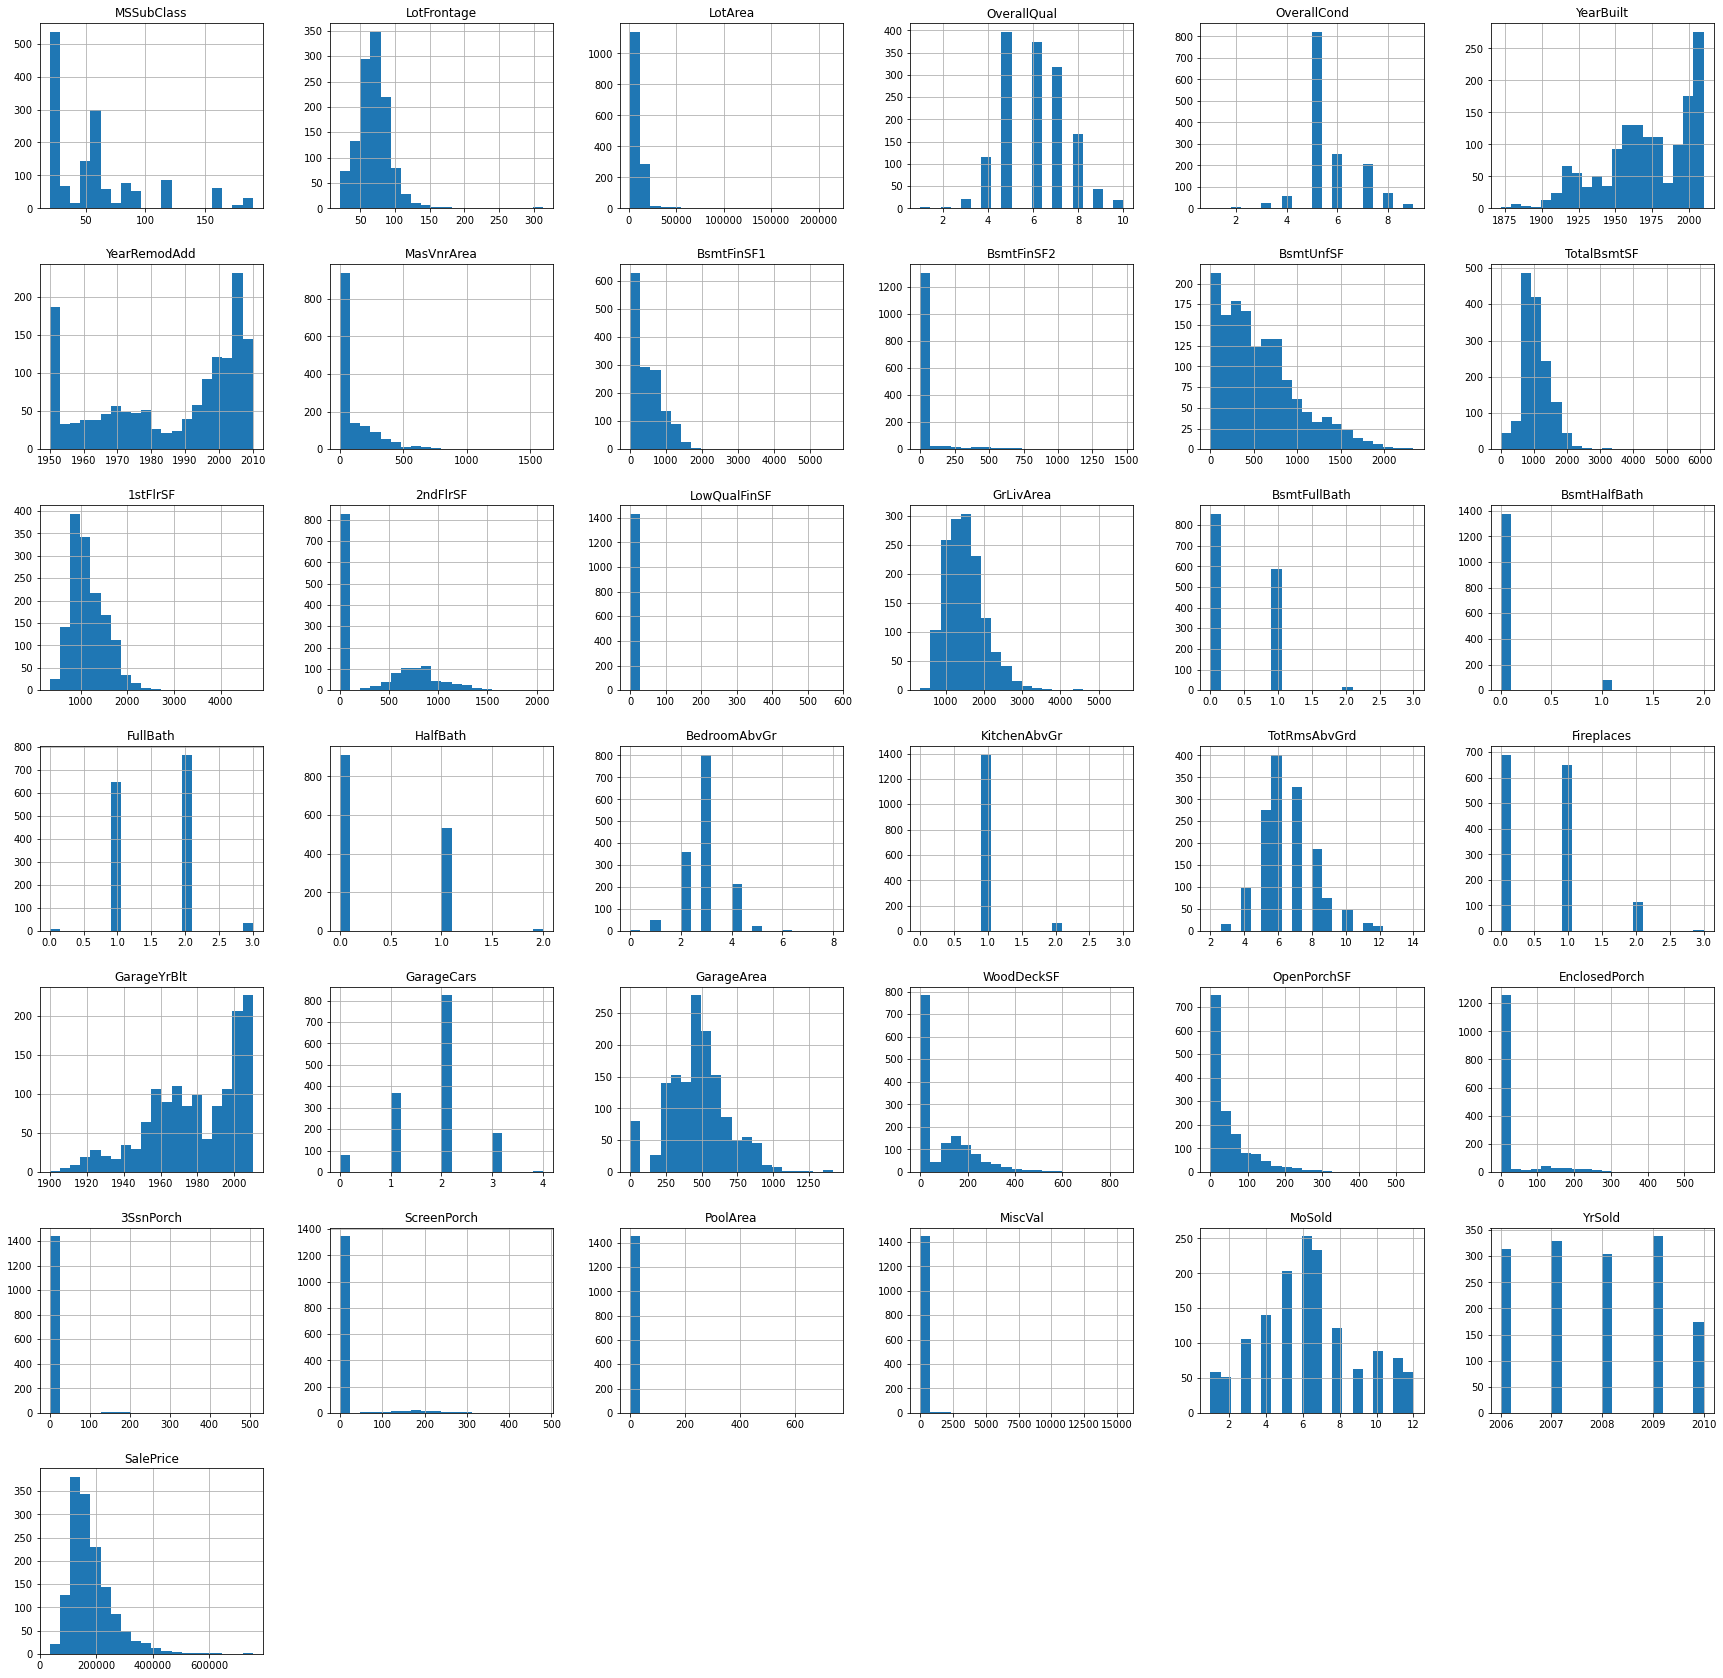

In [22]:
data_train.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

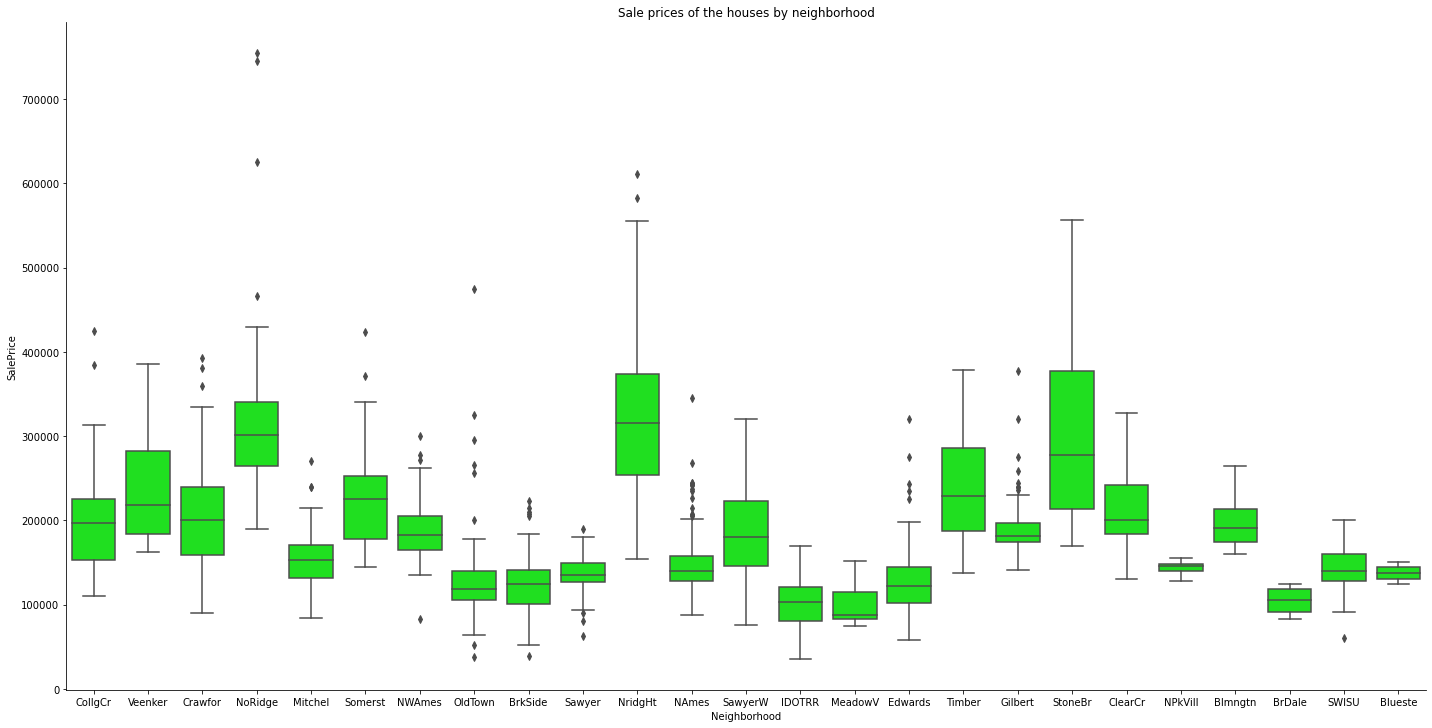

In [23]:
sns.catplot(x = "Neighborhood",
            y = "SalePrice",
            kind = "box",
            height = 10,
            aspect = 2,
            color = "#00FF00",
            data = data_train).set(title = "Sale prices of the houses by neighborhood"); #from kaggle https://www.kaggle.com/code/iabahmad19/house-price-prediction-top-6

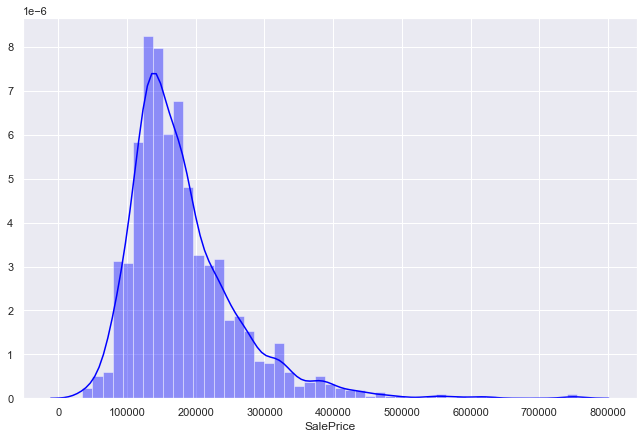

In [24]:
#price distribution
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(data_train["SalePrice"], color = "blue")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


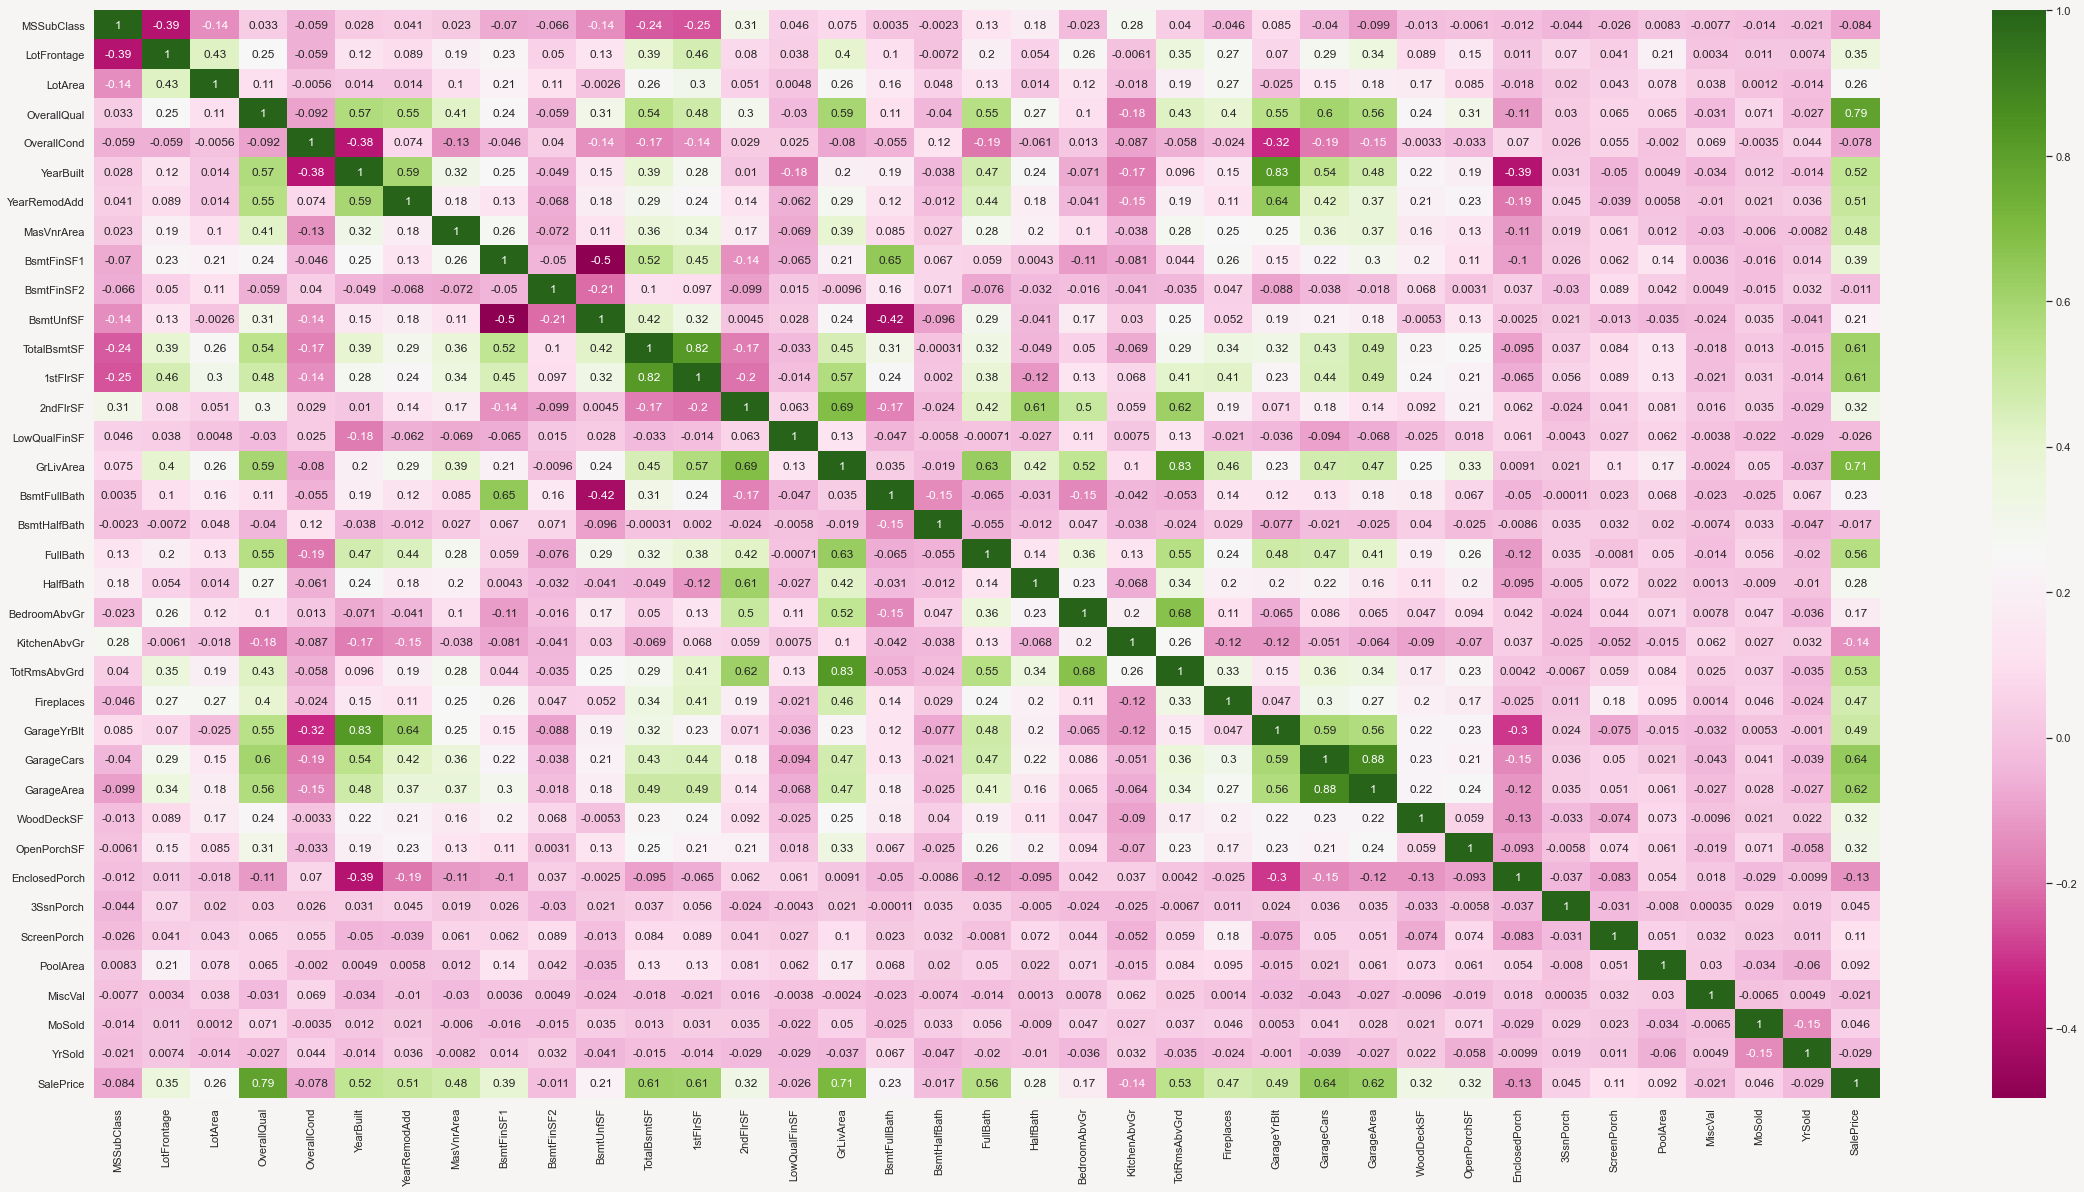

In [25]:
#head mat
plt.figure(figsize = [40, 20], facecolor = "#F7F4F4")
sns.heatmap(data_train.corr(), annot = True, cmap = "PiYG")

In [26]:
#more corelated features with price
correlation_df = data_train.corr()
high_correlation_variables = correlation_df.index[abs(correlation_df["SalePrice"]) > 0.35]
high_correlation_variables

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [27]:
#list_non correlated numerical feature 
low_correlation_variables=[]
low_correlation_variables=[elt for elt in list_numeric_vars if elt not in high_correlation_variables]
low_correlation_variables

['MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [28]:
# variables that have highest correlation with target variable 
correlation_df[high_correlation_variables].corr()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
LotFrontage,1.000000,0.458377,0.266324,0.196254,0.444685,0.404159,0.664214,0.732336,0.580868,0.390104,0.508958,0.567145,0.206144,0.494899,0.556442,0.586682
OverallQual,0.458377,1.000000,0.840035,0.833815,0.765094,0.380313,0.746365,0.697730,0.750886,0.832727,0.573901,0.636214,0.829980,0.901595,0.877826,0.961367
YearBuilt,0.266324,0.840035,1.000000,0.881460,0.649466,0.424626,0.646607,0.542870,0.414276,0.694464,0.236715,0.367547,0.973774,0.843941,0.813424,0.784025
YearRemodAdd,0.196254,0.833815,0.881460,1.000000,0.531707,0.282874,0.537961,0.451390,0.438829,0.701146,0.284679,0.310089,0.904348,0.767142,0.727999,0.757755
MasVnrArea,0.444685,0.765094,0.649466,0.531707,1.000000,0.454394,0.662787,0.639121,0.649891,0.626649,0.499050,0.576648,0.598656,0.737406,0.737732,0.801564
BsmtFinSF1,0.404159,0.380313,0.424626,0.282874,0.454394,1.000000,0.640936,0.604221,0.190528,0.107291,-0.016782,0.466035,0.319471,0.410051,0.484066,0.509466
TotalBsmtSF,0.664214,0.746365,0.646607,0.537961,0.662787,0.640936,1.000000,0.966199,0.531303,0.530986,0.343808,0.613673,0.578421,0.726969,0.776655,0.813056
1stFlrSF,0.732336,0.697730,0.542870,0.451390,0.639121,0.604221,0.966199,1.000000,0.599220,0.554042,0.446570,0.658933,0.480761,0.696805,0.748833,0.793321
GrLivArea,0.580868,0.750886,0.414276,0.438829,0.649891,0.190528,0.531303,0.599220,1.000000,0.830673,0.944780,0.677413,0.421689,0.663660,0.644212,0.808613
FullBath,0.390104,0.832727,0.694464,0.701146,0.626649,0.107291,0.530986,0.554042,0.830673,1.000000,0.771406,0.472859,0.725366,0.773044,0.720296,0.806790


In [31]:
checknulpercent=data_train.isnull().sum().sort_values(ascending = False)
checknulpercent.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [32]:
checknulsum=data_train.isnull().mean().sort_values(ascending = False)*100
checknulsum.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

In [33]:
#copy for droping low_correlation_variables
data_train1=data_train.copy()
data_test1=data_test.copy()

train_remove_low_correlation_variables=[elt for elt in data_train1 if elt not in low_correlation_variables]
test_remove_low_correlation_variables=[elt for elt in data_test1 if elt not in low_correlation_variables]

data_train1=data_train1[train_remove_low_correlation_variables]
data_test1=data_test1[test_remove_low_correlation_variables]

In [34]:
len(data_train1.columns)

59

In [35]:
#Counter(data_train['LotArea']).items()

# outlier detection

In [36]:
#copy for droping Dropping Outliers

def outlier_detection_train(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train


In [37]:
#copy for droping Dropping Outliers
data_train2=data_train1.copy()

will_drop_train = outlier_detection_train(data_train2, 5, data_train2.select_dtypes(["float", "int"]).columns)
data_train2.drop(will_drop_train, inplace = True, axis = 0)
len(data_train2),len(data_train1)

(1450, 1460)

# update null values

In [38]:
y_train2 = data_train2["SalePrice"]

In [39]:
len(y_train2)

1450

In [40]:
# check null cells 

checknulsum_train=data_train2.isnull().sum().sort_values(ascending = False)
checknulsum_test=data_test1.isnull().sum().sort_values(ascending = False)
checknulsum_train.head(20),checknulsum_test.head(20)

(PoolQC          1445
 MiscFeature     1396
 Alley           1359
 Fence           1171
 FireplaceQu      690
 LotFrontage      258
 GarageType        81
 GarageCond        81
 GarageQual        81
 GarageFinish      81
 GarageYrBlt       81
 BsmtFinType2      38
 BsmtExposure      38
 BsmtCond          37
 BsmtQual          37
 BsmtFinType1      37
 MasVnrType         8
 MasVnrArea         8
 Electrical         1
 HeatingQC          0
 dtype: int64,
 PoolQC          1456
 MiscFeature     1408
 Alley           1352
 Fence           1169
 FireplaceQu      730
 LotFrontage      227
 GarageYrBlt       78
 GarageCond        78
 GarageQual        78
 GarageFinish      78
 GarageType        76
 BsmtCond          45
 BsmtExposure      44
 BsmtQual          44
 BsmtFinType1      42
 BsmtFinType2      42
 MasVnrType        16
 MasVnrArea        15
 MSZoning           4
 Functional         2
 dtype: int64)

In [41]:
#dropping missing values > 200
checknulsum_train_df=pd.concat([checknulsum_train],keys = ["total number of missing data"],
                        axis = 1)
checknulsum_test_df=pd.concat([checknulsum_test],keys = ["total number of missing data"],
                        axis = 1)

In [43]:
#copy for  Dropping missing values >200 on each datasets
data_train3=data_train2.copy()
data_test3=data_test1.copy()


data_train3 = data_train3.drop((checknulsum_train_df[checknulsum_train_df["total number of missing data"] > 200]).index, axis = 1)
data_test3 = data_test3.drop((checknulsum_test_df[checknulsum_test_df["total number of missing data"] > 200]).index, axis = 1)

# train_and_test_df = train_and_test_df.drop(["Id", "SalePrice"], axis = 1)

In [44]:
# check null cells 

checknulsum_train3=data_train3.isnull().sum().sort_values(ascending = False)
checknulsum_test3=data_test3.isnull().sum().sort_values(ascending = False)
checknulsum_train3.head(20),checknulsum_test3.head(20)

(GarageType      81
 GarageCond      81
 GarageQual      81
 GarageFinish    81
 GarageYrBlt     81
 BsmtExposure    38
 BsmtFinType2    38
 BsmtFinType1    37
 BsmtCond        37
 BsmtQual        37
 MasVnrArea       8
 MasVnrType       8
 Electrical       1
 CentralAir       0
 1stFlrSF         0
 Heating          0
 HeatingQC        0
 TotRmsAbvGrd     0
 GrLivArea        0
 FullBath         0
 dtype: int64,
 GarageCond      78
 GarageQual      78
 GarageFinish    78
 GarageYrBlt     78
 GarageType      76
 BsmtCond        45
 BsmtExposure    44
 BsmtQual        44
 BsmtFinType2    42
 BsmtFinType1    42
 MasVnrType      16
 MasVnrArea      15
 MSZoning         4
 Utilities        2
 Functional       2
 SaleType         1
 Exterior1st      1
 Exterior2nd      1
 KitchenQual      1
 TotalBsmtSF      1
 dtype: int64)

In [45]:
# 
#copy for   dropping price columns on train
data_train4=data_train3.copy()
data_test4=data_test3.copy()


data_train4 = data_train4.drop(["SalePrice"], axis = 1)

In [46]:
data_train4 .columns,len(data_train4 .columns)

(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'),
 52)

In [47]:
data_test4 .columns,len(data_test4 .columns)

(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'),
 52)

In [48]:
#copy for   dropping price columns on train
data_train5=data_train4.copy()
data_test5=data_test4.copy()

numeric_data = [column for column in data_train5.select_dtypes(["int", "float"])]
categoric_data = [column for column in data_train5.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:#replace by median value
    data_train5[col].fillna(data_train5[col].median(), inplace = True)
    data_test5[col].fillna(data_test5[col].median(), inplace = True)
        
for col in categoric_data: #replace by most frequent value
    data_train5[col].fillna(data_train5[col].value_counts().index[0], inplace = True)
    data_test5[col].fillna(data_test5[col].value_counts().index[0], inplace = True)    
    

In [49]:
#ckeck whether there are missing values

data_train5.isnull().sum().sum(),data_train4.isnull().sum().sum(),data_test5.isnull().sum().sum(),data_test4.isnull().sum().sum()

(0, 609, 0, 652)

In [50]:
#non pertinent to drop

categoric_data

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [51]:
#additional feature to drop

#copy for   droping price columns on train
data_train6=data_train5.copy()
data_test6=data_test5.copy()

data_train6=data_train6.drop(["Condition2", "Exterior2nd", "BsmtFinType2"],axis = 1)
data_test6=data_test6.drop(["Condition2", "Exterior2nd", "BsmtFinType2"],axis = 1)
len(data_train6.columns),len(data_train5.columns),len(data_train6.columns),len(data_test5.columns)

(49, 52, 49, 52)

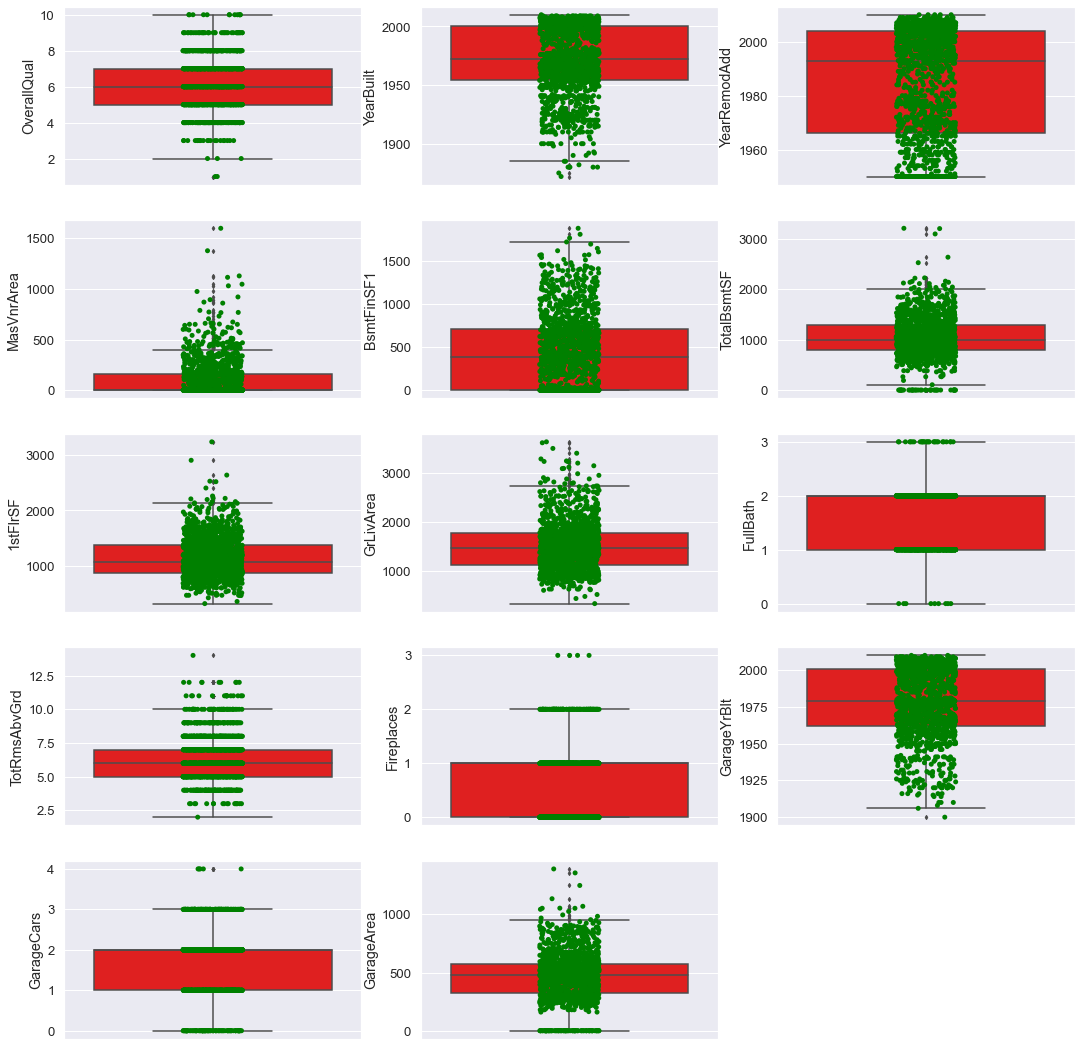

In [52]:
plt.figure(figsize=(15,30))
plt.tick_params(axis='both', which='major', labelsize=14)
sns.set(font_scale=1.2)

numeric_vars6 = data_train6.select_dtypes("number")

# plt.xticks([0,1,2], labels, fontsize=15)
liste=numeric_vars6
num=[l for l in range(1,len(numeric_vars6)+1)]
axe=[f"axe{elem}" for elem in num ]


plt.tight_layout(w_pad=30)

for i,j,k in zip(liste,axe,num):
    j=plt.subplot(10,3,k)
    sns.boxplot(data_train6[i],orient='v',color='red',fliersize=3).plot(ax=j)
    sns.stripplot(data_train6[i], color = 'green',orient='v')


In [53]:
#affichage année
nbre,occ=np.unique(data_train6['YearBuilt'].values,return_counts=True)
nbre,occ

(array([1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904,
        1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
        1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
        1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
        1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
        1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
        1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
        1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
        1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
        1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
        2009, 2010], dtype=int64),
 array([ 1,  1,  4,  1,  2,  2,  2,  1,  1, 10,  1,  1,  1,  2, 17,  1,  3,
         1,  7, 10,  8,  1,  7,  3, 30,  6,  8,  7,  7, 16,  9,  3,  7,  4,
         9,  6,  4,  3,  5,  9,  5,  4,  8, 18, 15,  2,  6,  7,  5, 14, 1

In [92]:

#création tranches de dates
data_train7=data_train6.copy()
data_test7=data_test6.copy()



data_train7['YearBuilt']=(data_train7['YearBuilt']//10)*10-1800
data_test7['YearBuilt']=(data_test7['YearBuilt']//10)*10

data_train7['GarageYrBlt']=(data_train7['GarageYrBlt']//10)*10-1800
data_test7['GarageYrBlt']=(data_test7['GarageYrBlt']//10)*10

data_train7['YearRemodAdd']=(data_train7['YearRemodAdd']//10)*10-1800
data_test7['YearRemodAdd']=(data_test7['YearRemodAdd']//10)*10-1800

nbre,occ=np.unique(data_train7['YearBuilt'].values,return_counts=True)
nbre,occ

(array([ 70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190,
        200, 210], dtype=int64),
 array([  2,   7,   6,  15,  58,  97,  53,  79, 167, 175, 188,  61, 161,
        380,   1], dtype=int64))

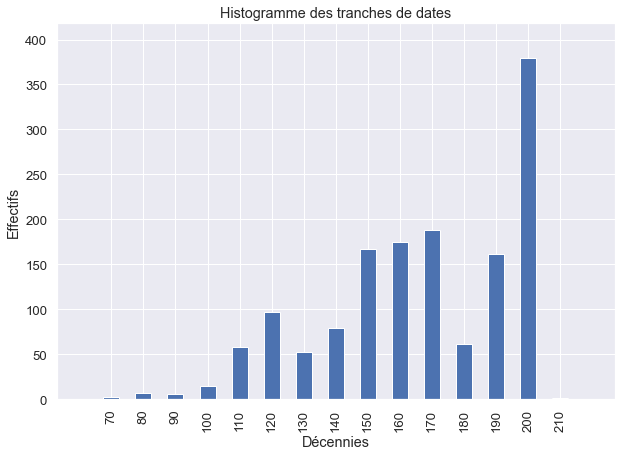

In [94]:
#analyse univariée variable numérique: Histogramme des tranches de dates
x = nbre
y = occ
width = 5

labels = nbre
plt.figure(figsize=(10,6))

plt.xticks(x, labels, rotation ='vertical')
#fig = plt.figure()

# clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.01)

# Labels
 
plt.xlabel('Décennies') 
plt.ylabel('Effectifs') 
  
# displaying the title
plt.title("Histogramme des tranches de dates")
  
plt.bar(x, y, width, color='b' )

plt.show()

In [95]:
#création tranches de dates
data_train7bis=data_train7.copy()
data_test7bis=data_test7.copy()



data_train7bis['YearBuilt']=(data_train7['YearBuilt'])
data_test7bis['YearBuilt']=(data_test7['YearBuilt'])

data_train7bis['GarageYrBlt']=(data_train7['GarageYrBlt'])
data_test7bis['GarageYrBlt']=(data_test7['GarageYrBlt'])

data_train7bis['YearRemodAdd']=(data_train7['YearRemodAdd'])
data_test7bis['YearRemodAdd']=(data_test7['YearRemodAdd'])

nbre,occ=np.unique(data_train7bis['YearBuilt'].values,return_counts=True)
nbre,occ

(array([ 70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190,
        200, 210], dtype=int64),
 array([  2,   7,   6,  15,  58,  97,  53,  79, 167, 175, 188,  61, 161,
        380,   1], dtype=int64))

In [96]:
#list for logarithms
list_log=['YearBuilt', 'YearRemodAdd','GarageYrBlt','MasVnrArea', 'BsmtFinSF1','TotalBsmtSF', '1stFlrSF', 'GrLivArea','TotRmsAbvGrd','GarageArea']

In [97]:
#copy for  logarithm scaling
data_train8=data_train7bis.copy()
data_test8=data_test7bis.copy()

for var in list_log:
    data_train8[var] = np.log1p(data_train8[var])
    data_test8[var] = np.log1p(data_test8[var])



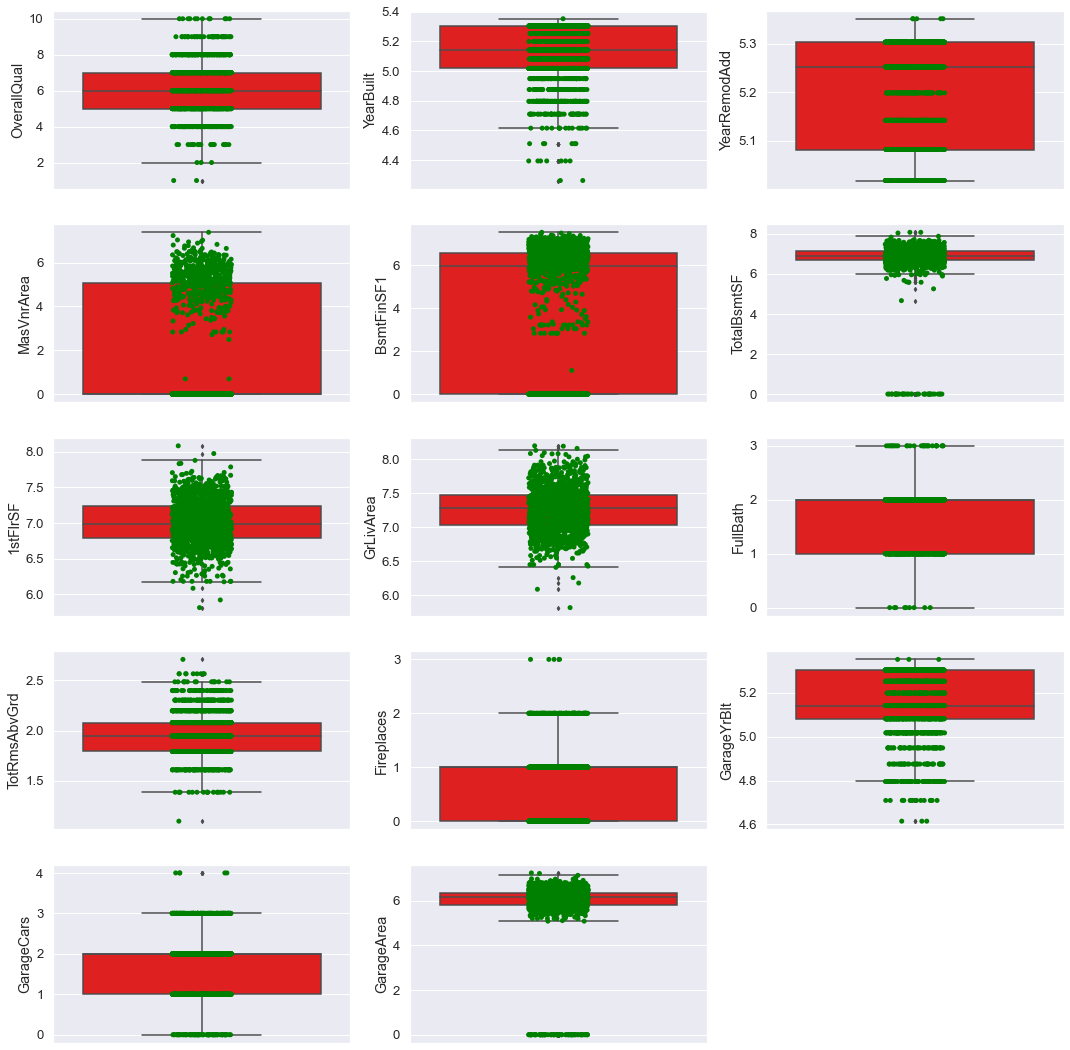

In [98]:
plt.figure(figsize=(15,30))
plt.tick_params(axis='both', which='major', labelsize=14)
sns.set(font_scale=1.2)

numeric_vars8 = data_train8.select_dtypes("number")

# plt.xticks([0,1,2], labels, fontsize=15)
liste8=numeric_vars8
num=[l for l in range(1,len(numeric_vars8)+1)]
axe=[f"axe{elem}" for elem in num ]


plt.tight_layout(w_pad=30)

for i,j,k in zip(liste8,axe,num):
    j=plt.subplot(10,3,k)
    sns.boxplot(data_train8[i],orient='v',color='red',fliersize=3).plot(ax=j)
    sns.stripplot(data_train8[i], color = 'green',orient='v')

In [99]:
numeric_vars8 = data_train8.select_dtypes("number")

In [100]:
len(data_train8.columns)

49

In [101]:
data_train8.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [102]:
numeric_vars8 = data_train8.select_dtypes("number").columns
numeric_vars8

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [103]:
alpha_vars8 = [elt for elt in data_train8.columns if elt not in data_train8.select_dtypes("number").columns]
alpha_vars8

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [104]:
#copy for target encoding categorieal variables
data_train9bis=data_train8.copy()
data_test9bis=data_test8.copy()

# for var in alpha_vars8:
#     data_train9['varbis']=data_train9['PrimaryPropertyType'].value_counts()[data20bis2.loc[:,'PrimaryPropertyType'].values].values

In [105]:
data_train9bis['MSZoning'].value_counts()

RL         1141
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [106]:
data_train9bis['MSZoning'].value_counts()[data_train9bis.loc[:,'MSZoning'].values].values

array([1141, 1141, 1141, ..., 1141, 1141, 1141], dtype=int64)

In [107]:
np.log1p(data_train9bis[var].value_counts()[data_train9bis.loc[:,var].values].values).min()

0.6931471805599453

In [108]:
#copy for target encoding categorieal variables
data_train9=data_train9bis.copy()
data_test9=data_test9bis.copy()

for var in alpha_vars8:
    tenc=ce.TargetEncoder(min_samples_leaf=20, smoothing=10)
    data_train9['countdraft']=np.log1p(data_train9[var].value_counts()[data_train9.loc[:,var].values].values) #subset for encoding
    #data_train9['countdraft']=data_train9[var].value_counts()[data_train9.loc[:,var].values].values    
    train_new_encoding=tenc.fit_transform(data_train9[var],data_train9['countdraft']) #encoding train
    data_train9 = train_new_encoding.join(data_train9.drop([var, 'countdraft'], axis = 1)) #update data_train9
    test_new_encoding=tenc.transform(data_test9[var]) #encoding test
    data_test9 = test_new_encoding.join(data_test9.drop([var], axis = 1)) #update data_test9                                       
len(data_train9.columns),len(data_train9bis.columns)

(49, 49)

In [109]:
data_train9

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,5.017278,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,7,5.303305,5.303305,5.283204,6.561031,6.753438,6.753438,7.444833,2,2.197225,0,5.303305,2,6.308098
2,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.60123,7.189922,7.212294,6.595781,7.257708,5.398163,4.859842,7.199678,6.428105,6.452049,7.149917,6.809039,6.770789,5.398163,7.26333,7.038784,6.583409,7.099202,4.400070,3.839932,7.225481,4.032673,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.141664,5.141664,0.000000,6.886532,7.141245,7.141245,7.141245,2,1.945910,1,5.141664,2,6.133398
3,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,4.736343,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,5.017278,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,7,5.303305,5.303305,5.093750,6.188264,6.825460,6.825460,7.488294,2,1.945910,1,5.303305,2,6.411818
4,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.961005,7.208600,6.37332,7.189922,7.212294,5.488938,7.257708,5.398163,6.898715,4.220001,6.530878,4.990437,7.149917,6.809039,6.770789,5.327876,7.26333,7.038784,6.089045,7.099202,7.134094,3.953595,7.225481,5.564520,7.279319,7.173192,6.171701,7.275865,7.040536,7,4.709530,5.141664,0.000000,5.379897,6.629363,6.869014,7.448916,1,2.079442,1,5.252273,3,6.466145
5,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,5.393628,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,3.780211,7.225481,4.032673,7.279319,7.173192,6.171701,7.275865,7.040536,8,5.303305,5.303305,5.860786,6.486161,7.044033,7.044033,7.695758,2,2.302585,1,5.303305,3,6.729824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.60123,7.189922,7.212294,6.595781,7.257708,6.146329,6.898715,7.199678,6.428105,6.459904,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.252273,5.303305,0.000000,0.000000,6.860664,6.860664,7.407318,2,2.079442,1,5.252273,2,6.133398
1457,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,4.331001,6.60123,7.189922,7.212294,6.061457,7.257708,5.398163,6.898715,7.199678,6.428105,6.452049,7.149917,6.809039,4.820333,4.691455,7.26333,7.038784,6.583409,7.099202,7.134094,4.304496,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.141664,5.198497,4.787492,6.673298,7.341484,7.637234,7.637234,2,2.079442,2,5.141664,2,6.216606
1458,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,4.220001,6.530878,5.379084,4.983614,4.028224,6.770789,4.120284,7.26333,7.038784,6.089045,7.099202,7.134094,3.953595,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,7,4.948760,5.3

In [110]:
data_train9bis

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5.303305,5.303305,Gable,CompShg,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,6.753438,GasA,Ex,Y,SBrkr,6.753438,7.444833,2,Gd,2.197225,Typ,0,Attchd,5.303305,RFn,2,6.308098,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,5.141664,5.141664,Gable,CompShg,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,7.141245,GasA,Ex,Y,SBrkr,7.141245,7.141245,2,TA,1.945910,Typ,1,Attchd,5.141664,RFn,2,6.133398,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5.303305,5.303305,Gable,CompShg,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,6.825460,GasA,Ex,Y,SBrkr,6.825460,7.488294,2,Gd,1.945910,Typ,1,Attchd,5.303305,RFn,2,6.411818,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,4.709530,5.141664,Gable,CompShg,Wd Sdng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,6.629363,GasA,Gd,Y,SBrkr,6.869014,7.448916,1,Gd,2.079442,Typ,1,Detchd,5.252273,Unf,3,6.466145,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5.303305,5.303305,Gable,CompShg,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,7.044033,GasA,Ex,Y,SBrkr,7.044033,7.695758,2,Gd,2.302585,Typ,1,Attchd,5.303305,RFn,3,6.729824,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5.252273,5.303305,Gable,CompShg,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,6.860664,GasA,Ex,Y,SBrkr,6.860664,7.407318,2,TA,2.079442,Typ,1,Attchd,5.252273,RFn,2,6.133398,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,5.141664,5.198497,Gable,CompShg,Plywood,Stone,4.787492,TA,TA,CBlock,Gd,TA,No,ALQ,6.673298,7.341484,GasA,TA,Y,SBrkr,7.637234,7.637234,2,TA,2.079442,Min1,2,Attchd,5.141664,Unf,2,6.216606,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,4.948760,5.303305,Gable,CompShg,CemntBd,None,0.000000,Ex,Gd,Stone,TA,Gd,No,GLQ,5.620401,7.050123,GasA,Ex,Y,SBrkr,7.080868,7.758333,2,Gd,2.302585,Typ,2,Attchd,4.948760,RFn,1,5.533389,TA,TA,Y,WD,Normal


In [111]:
data_test9

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.583409,7.099202,4.400070,5.420535,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.079964,5,7.581210,5.081404,0.000000,6.150603,6.783325,6.799056,6.799056,1,1.791759,0,7.581210,1.0,6.594413
1462,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.37332,7.189922,7.212294,6.061457,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.091310,5.327876,7.26333,5.631212,6.583409,7.099202,7.134094,5.420535,7.225481,5.564520,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.576097,5.017280,4.691348,6.828712,7.192934,7.192934,7.192934,1,1.945910,0,7.576097,1.0,5.746203
1463,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.018593,6.898715,7.199678,6.428105,6.459904,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,5,7.596392,5.252273,0.000000,6.674561,6.834109,6.834109,7.396335,2,1.945910,1,7.596392,2.0,6.180017
1464,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,7.199678,6.530878,6.459904,7.149917,6.809039,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.596392,5.252273,3.044522,6.401917,6.831954,6.831954,7.380879,2,2.079442,1,7.596392,2.0,6.154858
1465,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.428105,6.459904,7.149917,6.190315,6.770789,5.402677,7.26333,7.038784,6.583409,4.745088,7.134094,3.689201,7.225481,6.953684,7.279319,4.069978,6.171701,7.275865,7.040536,8,7.596392,5.252273,0.000000,5.575949,7.155396,7.155396,7.155396,2,1.791759,0,7.596392,2.0,6.228511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.146329,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.043136,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,0.000000,6.304449,6.304449,6.996681,1,1.791759,0,7.586296,0.0,0.000000
2916,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.357239,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.745088,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,5.533389,6.304449,6.304449,6.996681,1,1.945910,0,7.586296,1.0,5.659482
2917,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.961005,7.2086,6.60123,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.583409,7.099202,7.134094,3.936995,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,5

In [112]:
data_test9bis

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,7.581210,5.081404,Gable,CompShg,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,6.150603,6.783325,GasA,TA,Y,SBrkr,6.799056,6.799056,1,TA,1.791759,Typ,0,Attchd,7.581210,Unf,1.0,6.594413,TA,TA,Y,WD,Normal
1462,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,7.576097,5.017280,Hip,CompShg,Wd Sdng,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,6.828712,7.192934,GasA,TA,Y,SBrkr,7.192934,7.192934,1,Gd,1.945910,Typ,0,Attchd,7.576097,Unf,1.0,5.746203,TA,TA,Y,WD,Normal
1463,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,7.596392,5.252273,Gable,CompShg,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,6.674561,6.834109,GasA,Gd,Y,SBrkr,6.834109,7.396335,2,TA,1.945910,Typ,1,Attchd,7.596392,Fin,2.0,6.180017,TA,TA,Y,WD,Normal
1464,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,7.596392,5.252273,Gable,CompShg,VinylSd,BrkFace,3.044522,TA,TA,PConc,TA,TA,No,GLQ,6.401917,6.831954,GasA,Ex,Y,SBrkr,6.831954,7.380879,2,Gd,2.079442,Typ,1,Attchd,7.596392,Fin,2.0,6.154858,TA,TA,Y,WD,Normal
1465,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,7.596392,5.252273,Gable,CompShg,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,5.575949,7.155396,GasA,Ex,Y,SBrkr,7.155396,7.155396,2,Gd,1.791759,Typ,0,Attchd,7.596392,RFn,2.0,6.228511,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,4,7.586296,5.141664,Gable,CompShg,CemntBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,6.304449,GasA,Gd,Y,SBrkr,6.304449,6.996681,1,TA,1.791759,Typ,0,Attchd,7.586296,Unf,0.0,0.000000,TA,TA,Y,WD,Normal
2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,4,7.586296,5.141664,Gable,CompShg,CemntBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,5.533389,6.304449,GasA,TA,Y,SBrkr,6.304449,6.996681,1,TA,1.945910,Typ,0,CarPort,7.586296,Unf,1.0,5.659482,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,1Fam,1Story,5,7.581210,5.252273,Gable,CompShg,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,ALQ,7.110696,7.110696,GasA,Ex,Y,SBrkr,7.110696,7.110696,1,TA,2.079442,Typ,1,Detchd,7.581210,Unf,2.0,6.357842,TA,TA,Y,WD,Abnorml


In [113]:
data_train9.select_dtypes("number")

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,5.017278,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,7,5.303305,5.303305,5.283204,6.561031,6.753438,6.753438,7.444833,2,2.197225,0,5.303305,2,6.308098
2,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.60123,7.189922,7.212294,6.595781,7.257708,5.398163,4.859842,7.199678,6.428105,6.452049,7.149917,6.809039,6.770789,5.398163,7.26333,7.038784,6.583409,7.099202,4.400070,3.839932,7.225481,4.032673,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.141664,5.141664,0.000000,6.886532,7.141245,7.141245,7.141245,2,1.945910,1,5.141664,2,6.133398
3,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,4.736343,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,5.017278,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,7,5.303305,5.303305,5.093750,6.188264,6.825460,6.825460,7.488294,2,1.945910,1,5.303305,2,6.411818
4,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.961005,7.208600,6.37332,7.189922,7.212294,5.488938,7.257708,5.398163,6.898715,4.220001,6.530878,4.990437,7.149917,6.809039,6.770789,5.327876,7.26333,7.038784,6.089045,7.099202,7.134094,3.953595,7.225481,5.564520,7.279319,7.173192,6.171701,7.275865,7.040536,7,4.709530,5.141664,0.000000,5.379897,6.629363,6.869014,7.448916,1,2.079442,1,5.252273,3,6.466145
5,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,5.393628,7.199678,6.428105,6.459904,7.149917,6.190315,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,3.780211,7.225481,4.032673,7.279319,7.173192,6.171701,7.275865,7.040536,8,5.303305,5.303305,5.860786,6.486161,7.044033,7.044033,7.695758,2,2.302585,1,5.303305,3,6.729824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.60123,7.189922,7.212294,6.595781,7.257708,6.146329,6.898715,7.199678,6.428105,6.459904,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.252273,5.303305,0.000000,0.000000,6.860664,6.860664,7.407318,2,2.079442,1,5.252273,2,6.133398
1457,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,4.331001,6.60123,7.189922,7.212294,6.061457,7.257708,5.398163,6.898715,7.199678,6.428105,6.452049,7.149917,6.809039,4.820333,4.691455,7.26333,7.038784,6.583409,7.099202,7.134094,4.304496,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,6,5.141664,5.198497,4.787492,6.673298,7.341484,7.637234,7.637234,2,2.079442,2,5.141664,2,6.216606
1458,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.208600,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,4.220001,6.530878,5.379084,4.983614,4.028224,6.770789,4.120284,7.26333,7.038784,6.089045,7.099202,7.134094,3.953595,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,7,4.948760,5.3

In [114]:
data_train9.isnull().sum(),data_test9.isnull().sum()

(SaleCondition    0
 SaleType         0
 PavedDrive       0
 GarageCond       0
 GarageQual       0
 GarageFinish     0
 GarageType       0
 Functional       0
 KitchenQual      0
 Electrical       0
 CentralAir       0
 HeatingQC        0
 Heating          0
 BsmtFinType1     0
 BsmtExposure     0
 BsmtCond         0
 BsmtQual         0
 Foundation       0
 ExterCond        0
 ExterQual        0
 MasVnrType       0
 Exterior1st      0
 RoofMatl         0
 RoofStyle        0
 HouseStyle       0
 BldgType         0
 Condition1       0
 Neighborhood     0
 LandSlope        0
 LotConfig        0
 Utilities        0
 LandContour      0
 LotShape         0
 Street           0
 MSZoning         0
 OverallQual      0
 YearBuilt        0
 YearRemodAdd     0
 MasVnrArea       0
 BsmtFinSF1       0
 TotalBsmtSF      0
 1stFlrSF         0
 GrLivArea        0
 FullBath         0
 TotRmsAbvGrd     0
 Fireplaces       0
 GarageYrBlt      0
 GarageCars       0
 GarageArea       0
 dtype: int64,
 Sale

In [115]:
y_train2.isnull().sum()

0

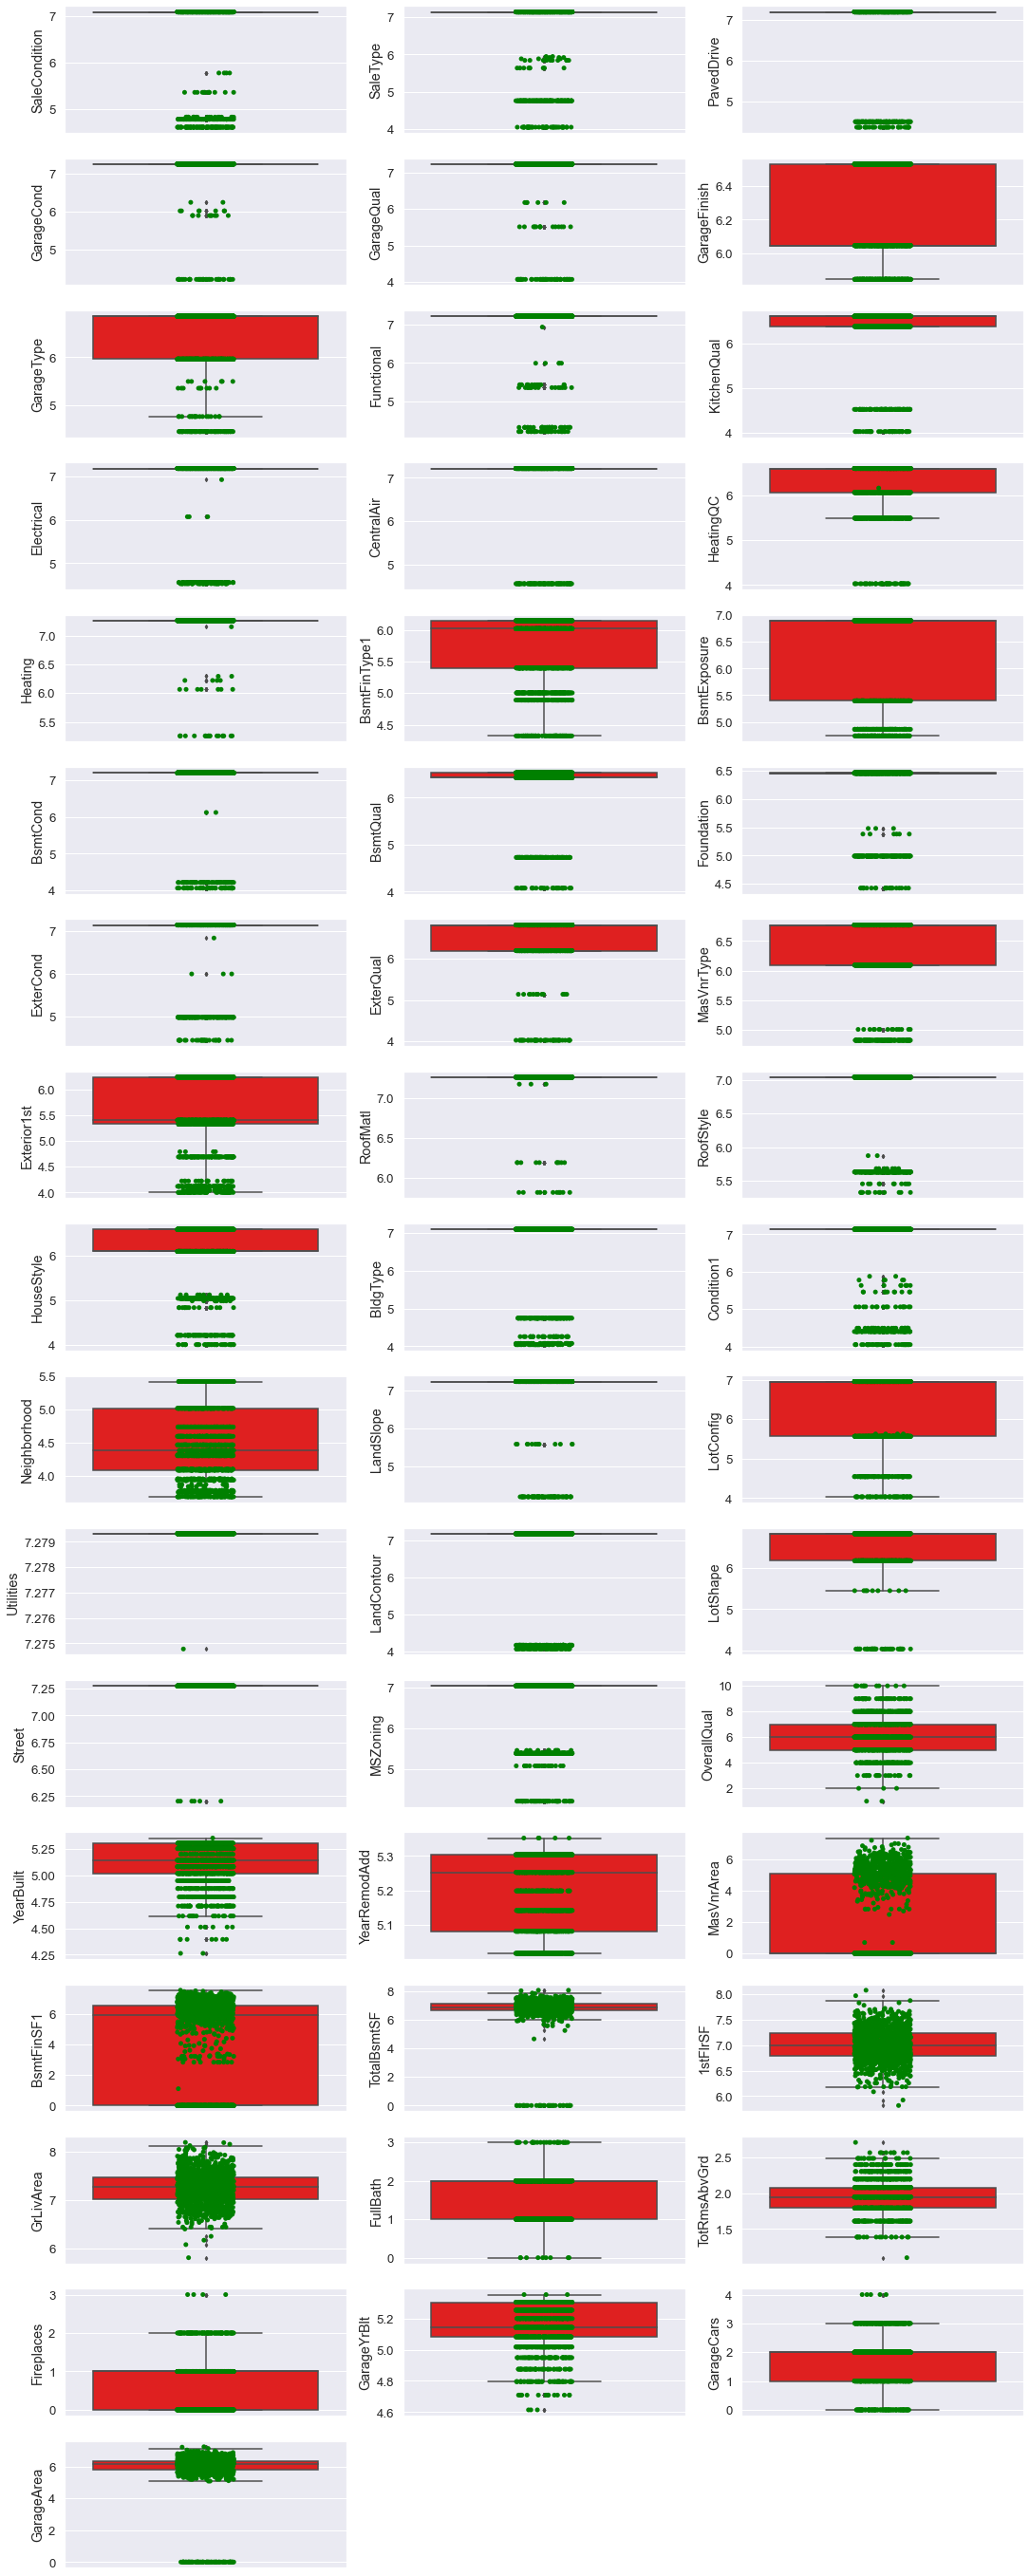

In [116]:
plt.figure(figsize=(15,45))
plt.tick_params(axis='both', which='major', labelsize=14)
sns.set(font_scale=1.2)

numeric_vars9 = data_train9.select_dtypes("number")

# plt.xticks([0,1,2], labels, fontsize=15)
liste9=numeric_vars9
num=[l for l in range(1,len(numeric_vars9)+1)]
axe=[f"axe{elem}" for elem in num ]


plt.tight_layout(w_pad=30)

for i,j,k in zip(liste9,axe,num):
    j=plt.subplot(20,3,k)
    sns.boxplot(data_train9[i],orient='v',color='red',fliersize=3).plot(ax=j)
    sns.stripplot(data_train9[i], color = 'green',orient='v')

In [117]:
y_train9=y_train2.copy()
y_train9=np.log1p(y_train2)
y_train9,len(y_train9),y_train9.min(),y_train9.max()

(Id
 1       12.247699
 2       12.109016
 3       12.317171
 4       11.849405
 5       12.429220
           ...    
 1456    12.072547
 1457    12.254868
 1458    12.493133
 1459    11.864469
 1460    11.901590
 Name: SalePrice, Length: 1450, dtype: float64,
 1450,
 10.460270761075149,
 13.345508528717259)

In [118]:
y_train2.min()

34900

In [119]:
#np.expm1(np.log1p(1000))

In [120]:
#enregistrement fichier train nettoyé
data_train9.to_csv('projet8_data_train9.csv', sep ='\t') 
data_test9.to_csv('projet8_data_test9.csv', sep ='\t') 
y_train9.to_csv('projet8_y_train9.csv', sep ='\t') 

In [121]:
x_train9 = data_train9[:len(data_train9)]
x_test9 = data_test9[:len(data_test9)]
len(x_train9),len(x_test9),len(y_train9)

(1450, 1459, 1450)

In [122]:
#évaluation : R2  MSE RMSE
def scoring(y_test,y_pred):
    r2=r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = math.sqrt(mse)
    print('R2: %f' % r2)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)

In [123]:
from sklearn.metrics import *

# train model with grid search

In [85]:
# #A1 GridSearchCV : ridge
# #define parameters
# param1 = {
#     'alpha':[1e-3,1e-2,1],
#     'fit_intercept':[True,False],
#     'normalize':[True,False],
# 'solver':['auto']
#        }
# # define evaluation
# cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# #define model
# model_ridge = Ridge()
# # define search
# search_ridge = GridSearchCV(model_ridge, param1, scoring='r2', n_jobs=-1, cv=cv1)
# # execute search
# result_ridge = search_ridge.fit(x_train9, y_train9)
# # summarize result
# print('Best Score ridge: %s' % result_ridge.best_score_)
# print('Best Hyperparameters ridge: %s' % result_ridge.best_params_)

In [124]:
#A1 GridSearchCV : ridge
#define parameters
param1 = {
    'alpha':[1e-3,1e-2,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto']
       }
# define evaluation
cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#define model
model_ridge = Ridge()
# define search
search_ridge = GridSearchCV(model_ridge, param1, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv1)
# execute search
result_ridge = search_ridge.fit(x_train9, y_train9)
# summarize result
print('Best Score ridge: %s' % result_ridge.best_score_)
print('Best Hyperparameters ridge: %s' % result_ridge.best_params_)

Best Score ridge: -0.09739989105945278
Best Hyperparameters ridge: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'auto'}


'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 


In [126]:
#A2 GridSearchCV : KernelRidge
#define parameters
param2 = {
    'alpha':[1e-3,1e-2,1],'gamma':[1e-4,1e-2,1],'kernel':['rbf','linear'],'degree':[2,3]
       }
# define evaluation
cv2 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#define model
model_KernelRidge = kernel_ridge.KernelRidge()
# define search
search_KernelRidge = GridSearchCV(model_KernelRidge, param2, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv2)
# execute search
result_KernelRidge = search_KernelRidge.fit(x_train9, y_train9)
# summarize result
print('Best Score KernelRidge: %s' % result_KernelRidge.best_score_)
print('Best Hyperparameters KernelRidge: %s' % result_KernelRidge.best_params_)

Best Score KernelRidge: -0.09658524637121864
Best Hyperparameters KernelRidge: {'alpha': 0.001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}


In [127]:
#A3 GridSearchCV XGBRegressor
#define parameters
param3 = {'max_depth':[5,10],'n_estimators': [50,500,1000],'min_child_weight':[0.01,1,10]}
# define evaluation
cv3 = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
#define model
model_XGBRegressor = XGBRegressor(seed=42,subsample=0.8,eta=0.1,colsample_bytree=0.8)
# define search
search_XGBRegressor = GridSearchCV(model_XGBRegressor, param3, scoring="neg_mean_absolute_error", n_jobs=-1, cv=cv3)
# execute search
result_XGBRegressor = search_XGBRegressor.fit(x_train9, y_train9)
# summarize result
print('Best Score_XGBRegressor: %s' % result_XGBRegressor.best_score_)
print('Best Hyperparameters_XGBRegressor: %s' % result_XGBRegressor.best_params_)

Best Score_XGBRegressor: -0.08993515818844601
Best Hyperparameters_XGBRegressor: {'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 500}


# fine tuning best model :

In [128]:
#A Séparons nos données train en un jeu d’entraînement et un jeu de test
X_train10, X_train_test10, y_train10, y_train_test10 = model_selection.train_test_split(x_train9, y_train9,test_size=0.2,random_state=1)

In [130]:
#fine tuning bestmodel A3 GridSearchCV XGBRegressor
#define model
bestmodel_XGBRegressor = XGBRegressor(seed=42,subsample=0.75,eta=0.0835,colsample_bytree=0.8,max_depth= 3,min_child_weight= 17,n_estimators= 200)
# execute search
bestmodelA = bestmodel_XGBRegressor.fit(X_train10, y_train10)
y_train_test10_pred=bestmodelA.predict(X_train_test10)
scoring(y_train_test10,y_train_test10_pred)

R2: 0.881502
MSE: 0.018284
RMSE: 0.135217


In [131]:
#evaluation best model 
## feature importance globale :A5 #fine tuned model best A3 : Fits the explainer: XGBRegressor
bestmodelA_explainer = shap.Explainer(bestmodelA.predict, X_train10)
# Calculates the SHAP values
bestmodelA_shap_values= bestmodelA_explainer(X_train_test10)

Permutation explainer: 291it [00:59,  4.87it/s]                                                                        


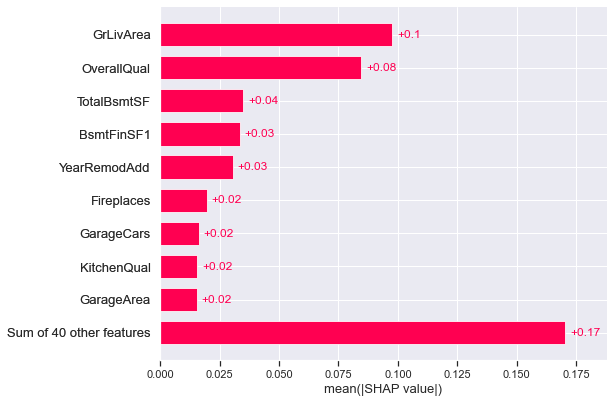

In [132]:
#evaluation best model 
shap.plots.bar(bestmodelA_shap_values)

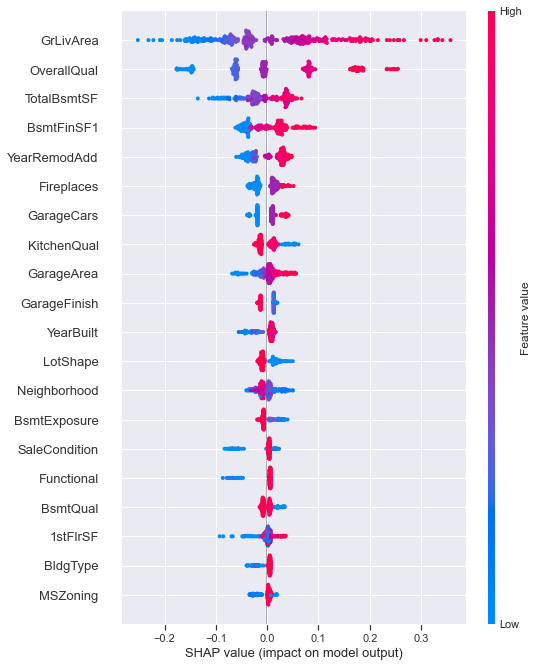

In [133]:
#evaluation best model 
## feature importance globale :B5 #fine tuned model best A : Fits the explainer: essaim d'abeilles : XGBRegressor
shap.summary_plot(bestmodelA_shap_values)
# or 
#shap.plots.beeswarm(bestmodelA_shap_values)

# final prediction for test data

In [134]:
#prediction
y_test10_pred=bestmodelA.predict(x_test9)

In [135]:
y_test10_pred

array([11.703561, 11.941439, 12.08409 , ..., 11.925631, 11.682531,
       12.36388 ], dtype=float32)

In [136]:
sale_price_predict=np.expm1(y_test10_pred)
sale_price_predict

array([121000.81, 153496.36, 177031.78, ..., 151088.94, 118482.78,
       234187.16], dtype=float32)

In [137]:
x_test9

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.583409,7.099202,4.400070,5.420535,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.079964,5,7.581210,5.081404,0.000000,6.150603,6.783325,6.799056,6.799056,1,1.791759,0,7.581210,1.0,6.594413
1462,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.37332,7.189922,7.212294,6.061457,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.091310,5.327876,7.26333,5.631212,6.583409,7.099202,7.134094,5.420535,7.225481,5.564520,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.576097,5.017280,4.691348,6.828712,7.192934,7.192934,7.192934,1,1.945910,0,7.576097,1.0,5.746203
1463,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.018593,6.898715,7.199678,6.428105,6.459904,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,5,7.596392,5.252273,0.000000,6.674561,6.834109,6.834109,7.396335,2,1.945910,1,7.596392,2.0,6.180017
1464,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,7.199678,6.530878,6.459904,7.149917,6.809039,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.596392,5.252273,3.044522,6.401917,6.831954,6.831954,7.380879,2,2.079442,1,7.596392,2.0,6.154858
1465,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.428105,6.459904,7.149917,6.190315,6.770789,5.402677,7.26333,7.038784,6.583409,4.745088,7.134094,3.689201,7.225481,6.953684,7.279319,4.069978,6.171701,7.275865,7.040536,8,7.596392,5.252273,0.000000,5.575949,7.155396,7.155396,7.155396,2,1.791759,0,7.596392,2.0,6.228511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.146329,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.043136,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,0.000000,6.304449,6.304449,6.996681,1,1.791759,0,7.586296,0.0,0.000000
2916,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.357239,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.745088,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,5.533389,6.304449,6.304449,6.996681,1,1.945910,0,7.586296,1.0,5.659482
2917,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.961005,7.2086,6.60123,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.583409,7.099202,7.134094,3.936995,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,7.040536,5

In [138]:
final=x_test9.copy()
final['SalePrice']=sale_price_predict
final

,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.583409,7.099202,4.400070,5.420535,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.079964,5,7.581210,5.081404,0.000000,6.150603,6.783325,6.799056,6.799056,1,1.791759,0,7.581210,1.0,6.594413,121000.812500
1462,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.37332,7.189922,7.212294,6.061457,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.091310,5.327876,7.26333,5.631212,6.583409,7.099202,7.134094,5.420535,7.225481,5.564520,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.576097,5.017280,4.691348,6.828712,7.192934,7.192934,7.192934,1,1.945910,0,7.576097,1.0,5.746203,153496.359375
1463,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.018593,6.898715,7.199678,6.428105,6.459904,7.149917,6.809039,6.770789,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,5,7.596392,5.252273,0.000000,6.674561,6.834109,6.834109,7.396335,2,1.945910,1,7.596392,2.0,6.180017,177031.781250
1464,7.086738,7.142037,7.193686,7.242798,7.23201,5.843544,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,6.018593,6.898715,7.199678,6.530878,6.459904,7.149917,6.809039,6.091310,6.238325,7.26333,7.038784,6.089045,7.099202,7.134094,4.382051,7.225481,6.953684,7.279319,7.173192,6.171701,7.275865,7.040536,6,7.596392,5.252273,3.044522,6.401917,6.831954,6.831954,7.380879,2,2.079442,1,7.596392,2.0,6.154858,183235.359375
1465,7.086738,7.142037,7.193686,7.242798,7.23201,6.045005,6.851185,7.2086,6.37332,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.428105,6.459904,7.149917,6.190315,6.770789,5.402677,7.26333,7.038784,6.583409,4.745088,7.134094,3.689201,7.225481,6.953684,7.279319,4.069978,6.171701,7.275865,7.040536,8,7.596392,5.252273,0.000000,5.575949,7.155396,7.155396,7.155396,2,1.791759,0,7.596392,2.0,6.228511,196144.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.086738,7.142037,7.193686,7.242798,7.23201,6.530878,6.851185,7.2086,6.60123,7.189922,7.212294,5.488938,7.257708,6.146329,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.043136,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,0.000000,6.304449,6.304449,6.996681,1,1.791759,0,7.586296,0.0,0.000000,75772.375000
2916,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.357239,7.2086,6.60123,7.189922,7.212294,6.061457,7.257708,4.890360,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,4.120284,7.26333,7.038784,6.089045,4.745088,7.134094,3.752307,7.225481,6.953684,7.279319,7.173192,6.827629,7.275865,5.389072,4,7.586296,5.141664,0.000000,5.533389,6.304449,6.304449,6.996681,1,1.945910,0,7.586296,1.0,5.659482,74235.031250
2917,4.615793,7.142037,7.193686,7.242798,7.23201,6.530878,5.961005,7.2086,6.60123,7.189922,7.212294,6.595781,7.257708,5.398163,6.898715,7.199678,6.530878,6.452049,7.149917,6.809039,6.770789,6.238325,7.2633

In [162]:
# release=final[['SalePrice']]
# release

In [140]:
# #enregistrement pediction price 
# release.to_csv('AWOUKENG_GOUMTCHA_ARISTIDE_1_saleprice_predicted_122022.csv', sep ='\t') 

In [ ]:
# sample_submission.csv

In [150]:
sample_submission = pd.read_csv('sample_submission.csv') #lecture données

In [151]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [159]:
sample_submission['SalePrice']=sale_price_predict

In [160]:
sample_submission['SalePrice']

0       121000.812500
1       153496.359375
2       177031.781250
3       183235.359375
4       196144.156250
            ...      
1454     75772.375000
1455     74235.031250
1456    151088.937500
1457    118482.781250
1458    234187.156250
Name: SalePrice, Length: 1459, dtype: float32

In [157]:
# sample_submission['SalePrice']=sample_submission['SalePrice'].apply(lambda x: int(x))

In [161]:
#enregistrement pediction price 
sample_submission.to_csv('AWOUKENG_GOUMTCHA_ARISTIDE_1_saleprice_predicted_122022.csv',index=False) 